In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# 美化图表
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
# 读取训练数据
df = pd.read_csv("data/train.csv")
df.head()

# 查看数据维度（行数 * 列数）
print("数据维度: ", df.shape)

# 每列的数据类型和非空数量
df.info()

# 查看基本统计数据
df.describe()

df.isnull().sum()

# 绘制性别和是否生还的计数图
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Sex vs Survival")
plt.show()

sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Pclass vs Survival")
plt.show()


sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title("Embarked vs Survival")
plt.show()


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# 处理Age缺失值 （用中位数填充）
df['Age'].fillna(df['Age'].median(), inplace=True)


#删除Cabin （缺失太多，且不易利用）
df.drop(columns=['Cabin'], inplace=True)


#填补Embarked（用众数）
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

#分来变量数值化 （Label Encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##  Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Survival by Gender')

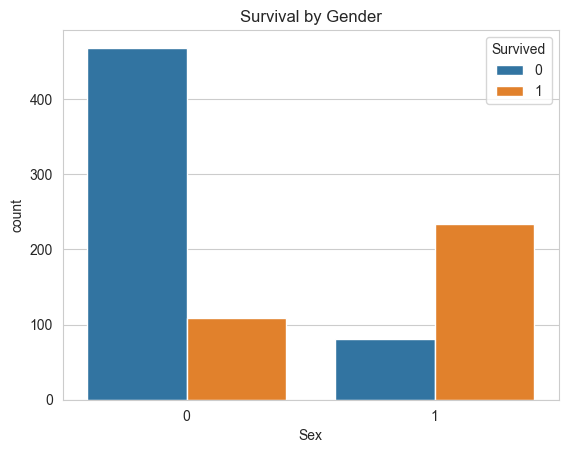

In [27]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")

#### Survival by Gender
This bar char shows a clear survival gap between males and females.
Female passengers had a significantly higher survival rate compared to males.
This supports the hypothesis that women were prioritized during evacuation.

Text(0.5, 1.0, 'Survival by Passenger Class')

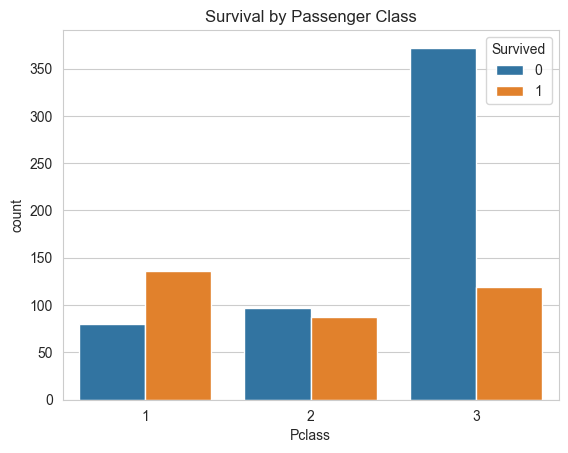

In [28]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")

####  Survival by Passenger Class
Passengers in first class had the highest survival rates, followed by second class and third class.  
This implies that passengers with higher socioeconomic status were more likely to survive, likely due to their cabin locations and earlier access to lifeboats.

Text(0.5, 1.0, 'Age Distribution by Survival')

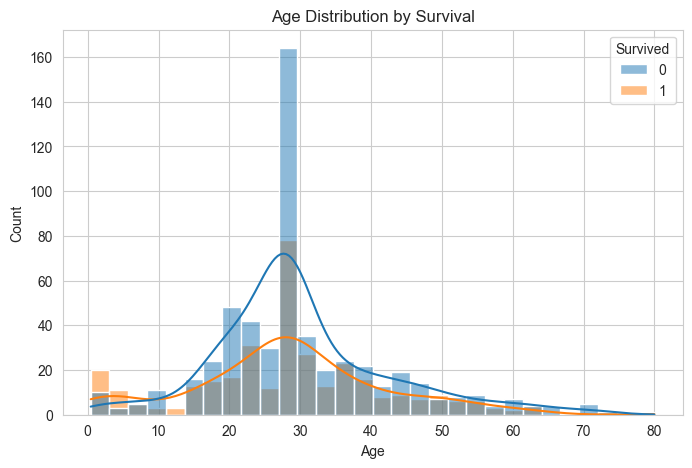

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")

####  Age Distribution by Survival
The age histogram shows that many survivors were children and younger adults.  
While adults of all ages were aboard, children had comparatively higher survival rates.  
This may reflect social norms prioritizing the rescue of children during the disaster.

Text(0.5, 1.0, 'Famliy Size vs. Survival Rate')

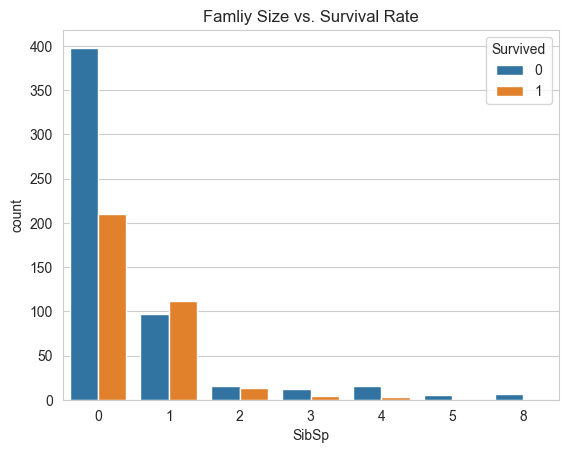

In [30]:
sns.countplot(data=df, x='SibSp', hue='Survived')
plt.title("Famliy Size vs. Survival Rate")

Text(0.5, 1.0, 'Famliy Size vs. Survival Rate')

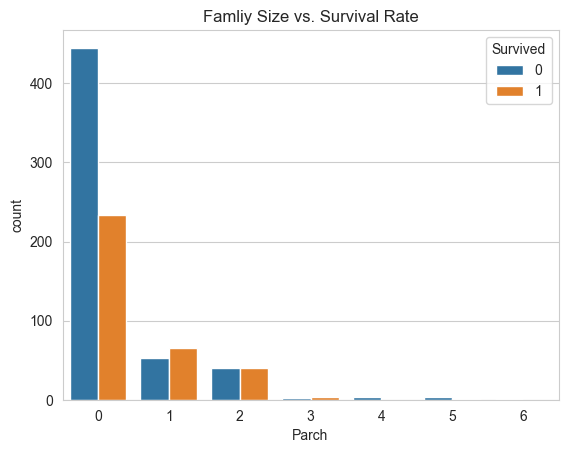

In [33]:
sns.countplot(data=df, x='Parch', hue='Survived')
plt.title("Famliy Size vs. Survival Rate")

Text(0.5, 1.0, 'Fare vs. Survival')

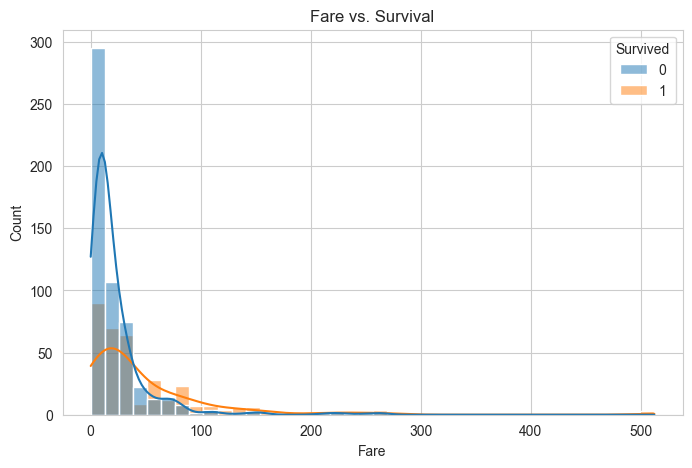

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Fare', hue='Survived', bins=40, kde=True)
plt.title("Fare vs. Survival")

Text(0.5, 1.0, 'Correlation Heatmap')

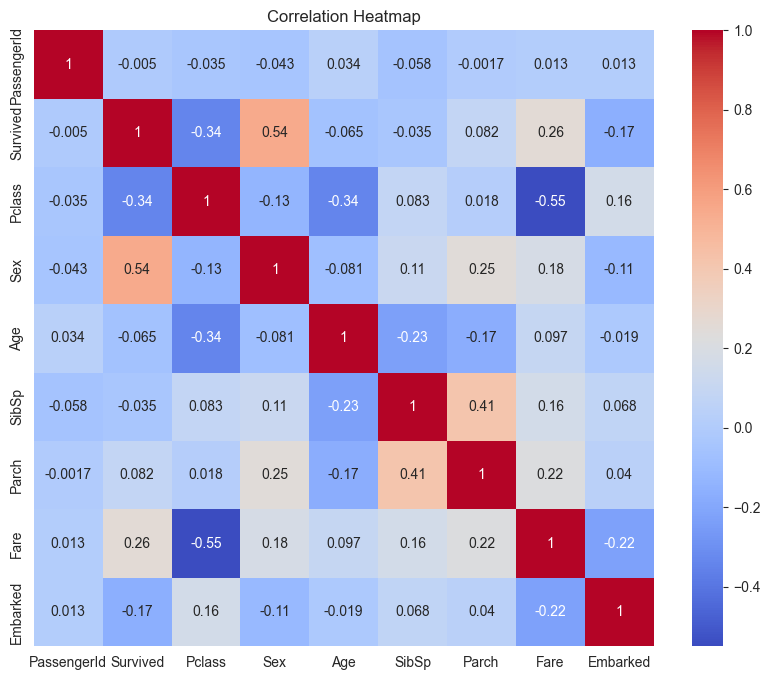

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")

####  Correlation Heatmap
The heatmap indicates that 'Sex' and 'Pclass' show strong correlations with the target variable 'Survived'.  
There is also some correlation between 'Fare' and 'Pclass', suggesting that richer passengers often had better accommodations.  
These insights will inform feature selection for the predictive model.

### Feature Engineering

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
# 添加 FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

#添加 IsAlone
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

#提取Title
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#统一罕见称呼为Rare类别
df['Title'] = df['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
     'Sir', 'Jonkheer', 'Dona'], 'Rare'
)
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

# 编码Title
title_map = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4}
df['Title'] = df['Title'].map(title_map)

df[['Name', 'Title', 'FamilySize', 'IsAlone']].head()

<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\MSI-NB\AppData\Local\Temp\ipykernel_40536\3437525025.py:9: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,Name,Title,FamilySize,IsAlone
0,"Braund, Mr. Owen Harris",0,2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,2,0
2,"Heikkinen, Miss. Laina",1,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,2,0
4,"Allen, Mr. William Henry",0,1,1


####  Feature Engineering
We added three new features:
- `FamilySize`: the total number of family members onboard
- `IsAlone`: whether the passenger was traveling alone
- `Title`: a simplified version of social title extracted from the name
These features are expected to enhance the model's ability to distinguish survival patterns.

In [41]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   ---------- ----------------------------- 2.4/8.7 MB 7.9 MB/s eta 0:00:01
   --------------- ------------------------ 3.4/8.7 MB 7.2 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.7 MB 8.0 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
    --------------------------------------- 0.8/38.5 MB 4.2 MB/s eta 0:00:09
   -- ------------------------------------- 2.1/38.5 MB 5.3 MB/s eta 0:00:07
   ---- ----------------------------------- 4.2/38.5 MB 6.4 MB/s eta 0:00:06
   ----- ---------------------------------- 5.5/38.5 MB 6.3 MB/s eta 0:00:06
   ------- ---------------

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [44]:
# 特征列
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']

# 目标标签列
target= 'Survived'

# X 输入特征，y是目标变量
X = df[features]
y = df[target]

# 拆分训练集和测试集（80%用于训练，20%用于测试）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# 创建模型对象
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 用训练数据拟合模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型准确率: {accuracy:.4f}")

模型准确率: 0.8324


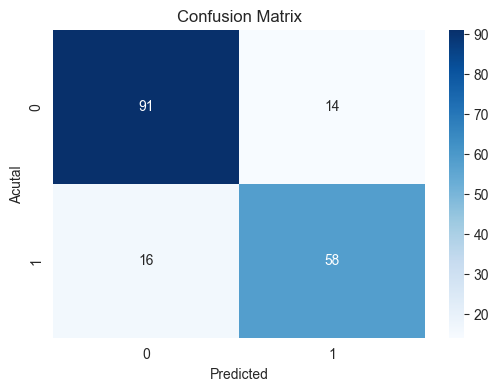

In [46]:
# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Acutal")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# 使用原始df的PassengerId 来创建提交文件
submission = df.loc[X_test.index, ['PassengerId']].copy()
submission['Survived'] = y_pred

#导出为CSV
submission.to_csv('submission.csv', index=False)
print("预测结果已保存为 submission.csv")

预测结果已保存为 submission.csv
